In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = pd.read_csv('kalData.txt', sep=",", header=None) # beacon 1 at 1 m away
data = np.array(data)
#print(data)
RSSI = data[:,1]
#print(len(RSSI))

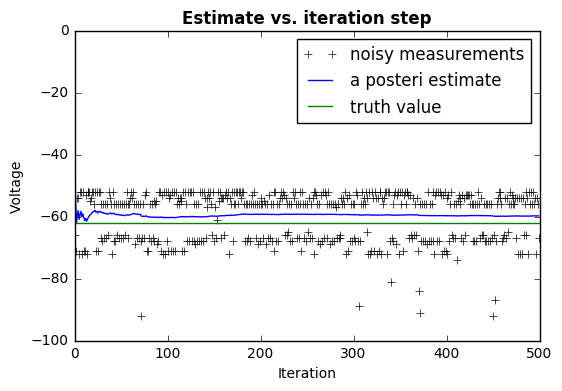

In [22]:





# # intial parameters
i = len(RSSI)
sz = (i,) # size of array
x = -62 # truth value (typo in example at top of p. 13 calls this z)
z = RSSI # observations (normal about x, sigma=0.1)
Q = 1e-8 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.01 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,i):
     # time update
     xhatminus[k] = xhat[k-1]
     Pminus[k] = P[k-1]+Q

     # measurement update
     K[k] = Pminus[k]/( Pminus[k]+R )
     xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
     P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.show()

In [24]:
data = pd.read_csv('kalDataBeacon4.txt', sep=",", header=None) # beacon 1 at 1 m away
data = np.array(data)
#print(data)
RSSI = data[:,1]
#print(len(RSSI))

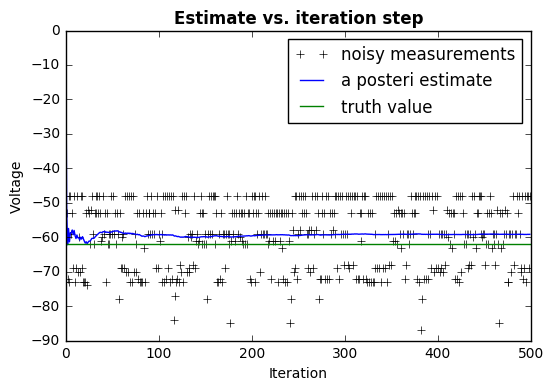

In [25]:
# # intial parameters
i = len(RSSI)
sz = (i,) # size of array
x = -62 # truth value (typo in example at top of p. 13 calls this z)
z = RSSI # observations (normal about x, sigma=0.1)


# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

Q = 1e-8 # process variance
R = 0.01 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,i):
     # time update
     xhatminus[k] = xhat[k-1]
     Pminus[k] = P[k-1]+Q

     # measurement update
     K[k] = Pminus[k]/( Pminus[k]+R )
     xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
     P[k] = (1-K[k])*Pminus[k]

plt.figure(2)
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.show()

In [26]:
xhat[-1]

-59.173837309134157